<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Fedbatch/blob/main/BPL_TEST2_Fedbatch_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
!python --version

Python 3.12.12


In [3]:
!uv pip install fmpy # Install the key package

Using Python 3.12.12 environment at: /usr
Resolved 19 packages in 975ms
Prepared 3 packages in 2.66s
Uninstalled 2 packages in 428ms
Installed 3 packages in 322ms
 - cmake==3.31.6
 + cmake==4.1.2
 + fmpy==0.3.26
 - numpy==2.0.2
 + numpy==2.3.5


# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_fmpy_explore.py

In [4]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch

Cloning into 'BPL_TEST2_Fedbatch'...


In [5]:
%cd BPL_TEST2_Fedbatch

/content/BPL_TEST2_Fedbatch


In [6]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [8]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



In [9]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



No processDiagram.png file in the FMU, but try the file on disk.


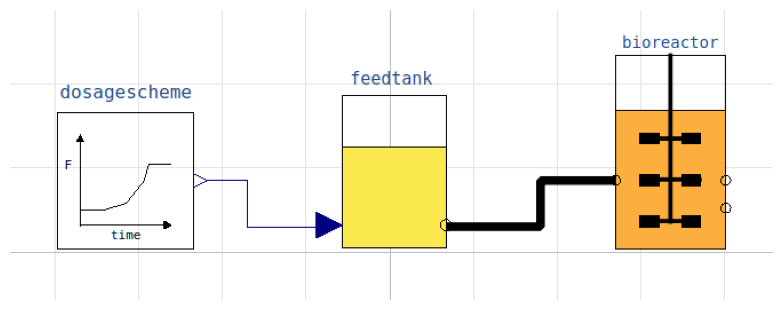

In [10]:
process_diagram()

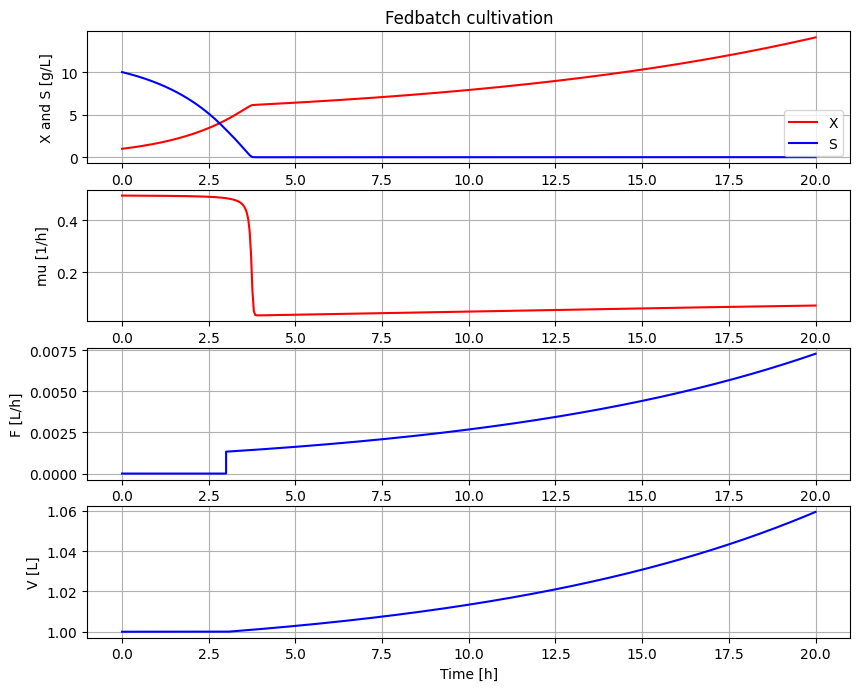

In [11]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu(20)

In [12]:
# Let us display and then save the feedprofile
disp('dosagescheme')

F_start : 0
mu_feed : 0.1
t_startExp : 3.0
F_startExp : 0.001
F_max : 0.3


In [15]:
feedprofile_1={'F_start':0, 'mu_feed':0.1, 't_startExp':3, 'F_startExp':0.001, 'F_max':0.3}

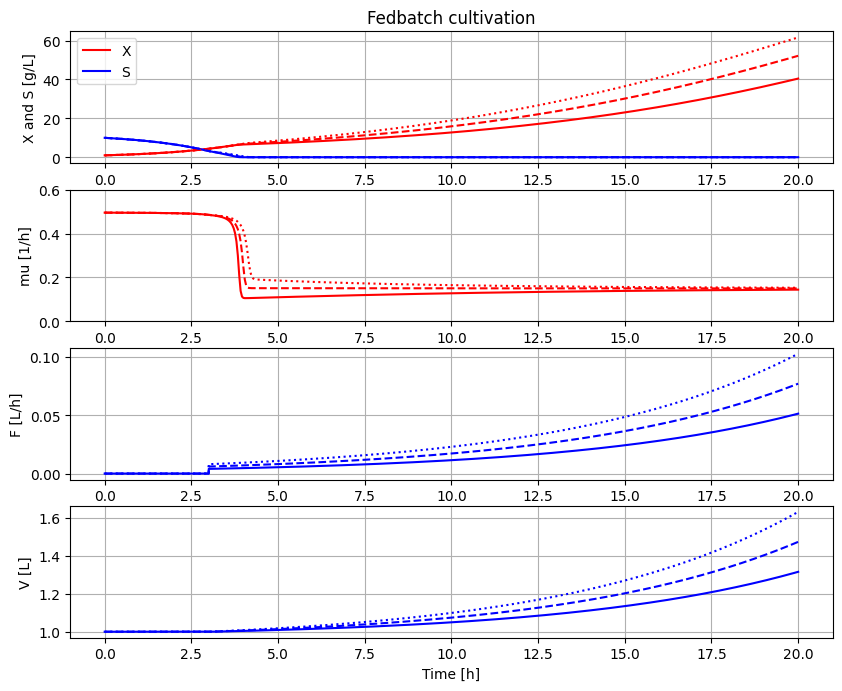

In [16]:
# Let us develop a feedprofile with mu_feed=0.15 1/h instead
newplot(plotType='TimeSeries'); ax2.set_ylim(0,0.6)

# Choose mu_feed
par(mu_feed=0.15)

# Tune F_startExp value to get a stable culture growth rate at mu 0.15 1/h
for value in [0.004, 0.006, 0.008]:
    par(F_startExp=value)
    simu(20)

In [17]:
# We choose F_startExp = 0.008 and save the new feedprofile
feedprofile_2={'F_start':0, 'mu_feed':0.15, 't_startExp':3, 'F_startExp':0.006, 'F_max':0.3}

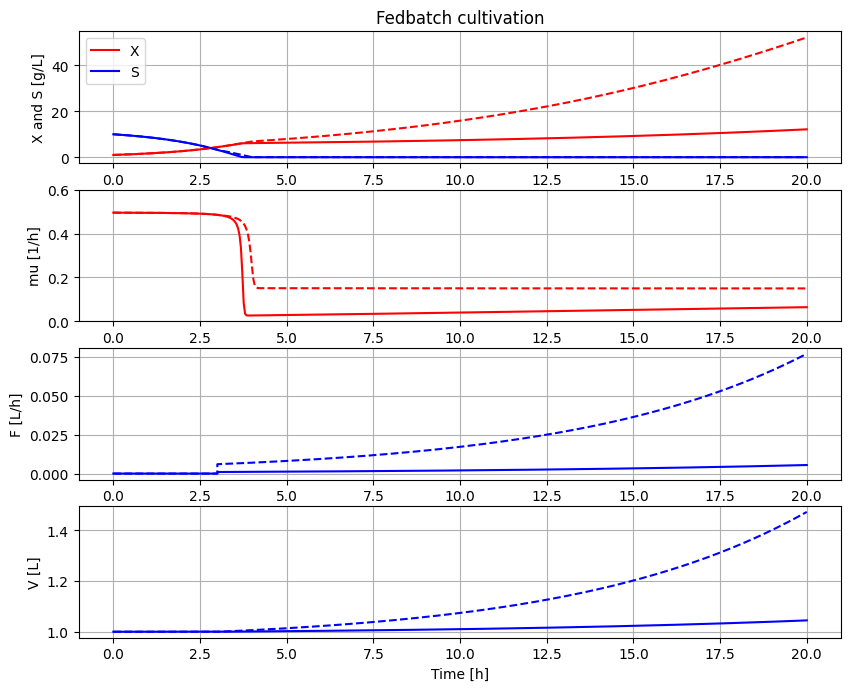

In [18]:
# Compare the result of ot the two
newplot(plotType='TimeSeries'); ax2.set_ylim(0,0.6)

for feedprofile in [feedprofile_1, feedprofile_2]:
    par(feedprofile)
    simu(20)

# Restore the original feedprofile
par(feedprofile_2)

In [19]:
describe('mu')

Cell specific growth rate variable : 0.15 [ 1/h ]


In [20]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [21]:
describe('MSL')

MSL: 4.1.0 - used components: RealInput, RealOutput


In [23]:
system_info()


System information
 -OS: Linux
 -Python: 3.12.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.26
 -FMU by: OpenModelica Compiler OpenModelica 1.26.0~dev-200-gcb3254b
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Fedbatch
 -Generated: 2025-07-28T07:58:59Z
 -MSL: 4.1.0
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore for FMPy version 1.0.2
